In [1]:
import pandas as pd
import numpy as np
from sklearn import datasets
from sklearn import tree
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold, cross_val_score
from sklearn import linear_model
from sklearn.preprocessing import scale
from sklearn.linear_model import RidgeCV
from sklearn.linear_model import LassoCV
from sklearn.decomposition import PCA
from sklearn.model_selection import KFold
from xgboost import XGBRegressor
import math
import seaborn as sns
from sklearn.metrics import mean_squared_error
import warnings
warnings.filterwarnings('ignore')


In [2]:
#data_2 = pd.read_csv("diagnosis.data", header = None)
#data_2

df = pd.read_csv("data/diagnosis.data", encoding='utf-16', sep='\t', names=['Temperature','Nausea','Lumbar','Urine','Micturition','Urethra','Bladder','Pelvis'], decimal=",")
df

,Temperature,Nausea,Lumbar,Urine,Micturition,Urethra,Bladder,Pelvis
0,35.5,no,yes,no,no,no,no,no
1,35.9,no,no,yes,yes,yes,yes,no
2,35.9,no,yes,no,no,no,no,no
3,36.0,no,no,yes,yes,yes,yes,no
4,36.0,no,yes,no,no,no,no,no
...,...,...,...,...,...,...,...,...
115,41.4,no,yes,yes,no,yes,no,yes
116,41.5,no,no,no,no,no,no,no
117,41.5,yes,yes,no,yes,no,no,yes
118,41.5,no,yes,yes,no,yes,no,yes


In [3]:
df["Nausea"].replace(('yes', 'no'), (1, 0), inplace=True)

df["Nausea"]


0      0
1      0
2      0
3      0
4      0
      ..
115    0
116    0
117    1
118    0
119    0
Name: Nausea, Length: 120, dtype: int64

In [4]:
df["Lumbar"].replace(('yes', 'no'), (1, 0), inplace=True)
df["Lumbar"]

0      1
1      0
2      1
3      0
4      1
      ..
115    1
116    0
117    1
118    1
119    1
Name: Lumbar, Length: 120, dtype: int64

In [5]:
df["Urine"].replace(('yes', 'no'), (1, 0), inplace=True)
df["Urine"]

0      0
1      1
2      0
3      1
4      0
      ..
115    1
116    0
117    0
118    1
119    1
Name: Urine, Length: 120, dtype: int64

In [6]:
df["Micturition"].replace(('yes', 'no'), (1, 0), inplace=True)
df["Micturition"]

0      0
1      1
2      0
3      1
4      0
      ..
115    0
116    0
117    1
118    0
119    0
Name: Micturition, Length: 120, dtype: int64

In [7]:
df["Urethra"].replace(('yes', 'no'), (1, 0), inplace=True)
df["Urethra"]

0      0
1      1
2      0
3      1
4      0
      ..
115    1
116    0
117    0
118    1
119    1
Name: Urethra, Length: 120, dtype: int64

In [8]:
df["Bladder"].replace(('yes', 'no'), (1, 0), inplace=True)
df["Bladder"]

0      0
1      1
2      0
3      1
4      0
      ..
115    0
116    0
117    0
118    0
119    0
Name: Bladder, Length: 120, dtype: int64

In [9]:
df["Pelvis"].replace(('yes', 'no'), (1, 0), inplace=True)
df["Pelvis"]



0      0
1      0
2      0
3      0
4      0
      ..
115    1
116    0
117    1
118    1
119    1
Name: Pelvis, Length: 120, dtype: int64

In [10]:
#df["Lumbar"].replace(('yes', 'no'), (1, 0), inplace=True)
df["Lumbar"]

0      1
1      0
2      1
3      0
4      1
      ..
115    1
116    0
117    1
118    1
119    1
Name: Lumbar, Length: 120, dtype: int64

In [11]:
df_new = df

In [12]:
X = (df[['Temperature', 'Nausea','Lumbar','Urine','Micturition','Urethra']])



In [13]:
y = (df[['Bladder','Pelvis']])

In [14]:
X

,Temperature,Nausea,Lumbar,Urine,Micturition,Urethra
0,35.5,0,1,0,0,0
1,35.9,0,0,1,1,1
2,35.9,0,1,0,0,0
3,36.0,0,0,1,1,1
4,36.0,0,1,0,0,0
...,...,...,...,...,...,...
115,41.4,0,1,1,0,1
116,41.5,0,0,0,0,0
117,41.5,1,1,0,1,0
118,41.5,0,1,1,0,1


In [15]:
y

,Bladder,Pelvis
0,0,0
1,1,0
2,0,0
3,1,0
4,0,0
...,...,...
115,0,1
116,0,0
117,0,1
118,0,1


# B) Build a decision tree on the whole data set and plot it

In [16]:
dt = tree.DecisionTreeClassifier(criterion='entropy')


In [17]:
dt.fit(X, y)

DecisionTreeClassifier(criterion='entropy')

In [18]:
dotfile = open("dt.dot", 'w')
tree.export_graphviz(dt, out_file=dotfile, feature_names=['Temperature', 'Nausea','Lumbar','Urine','Micturition','Urethra',])
dotfile.close()

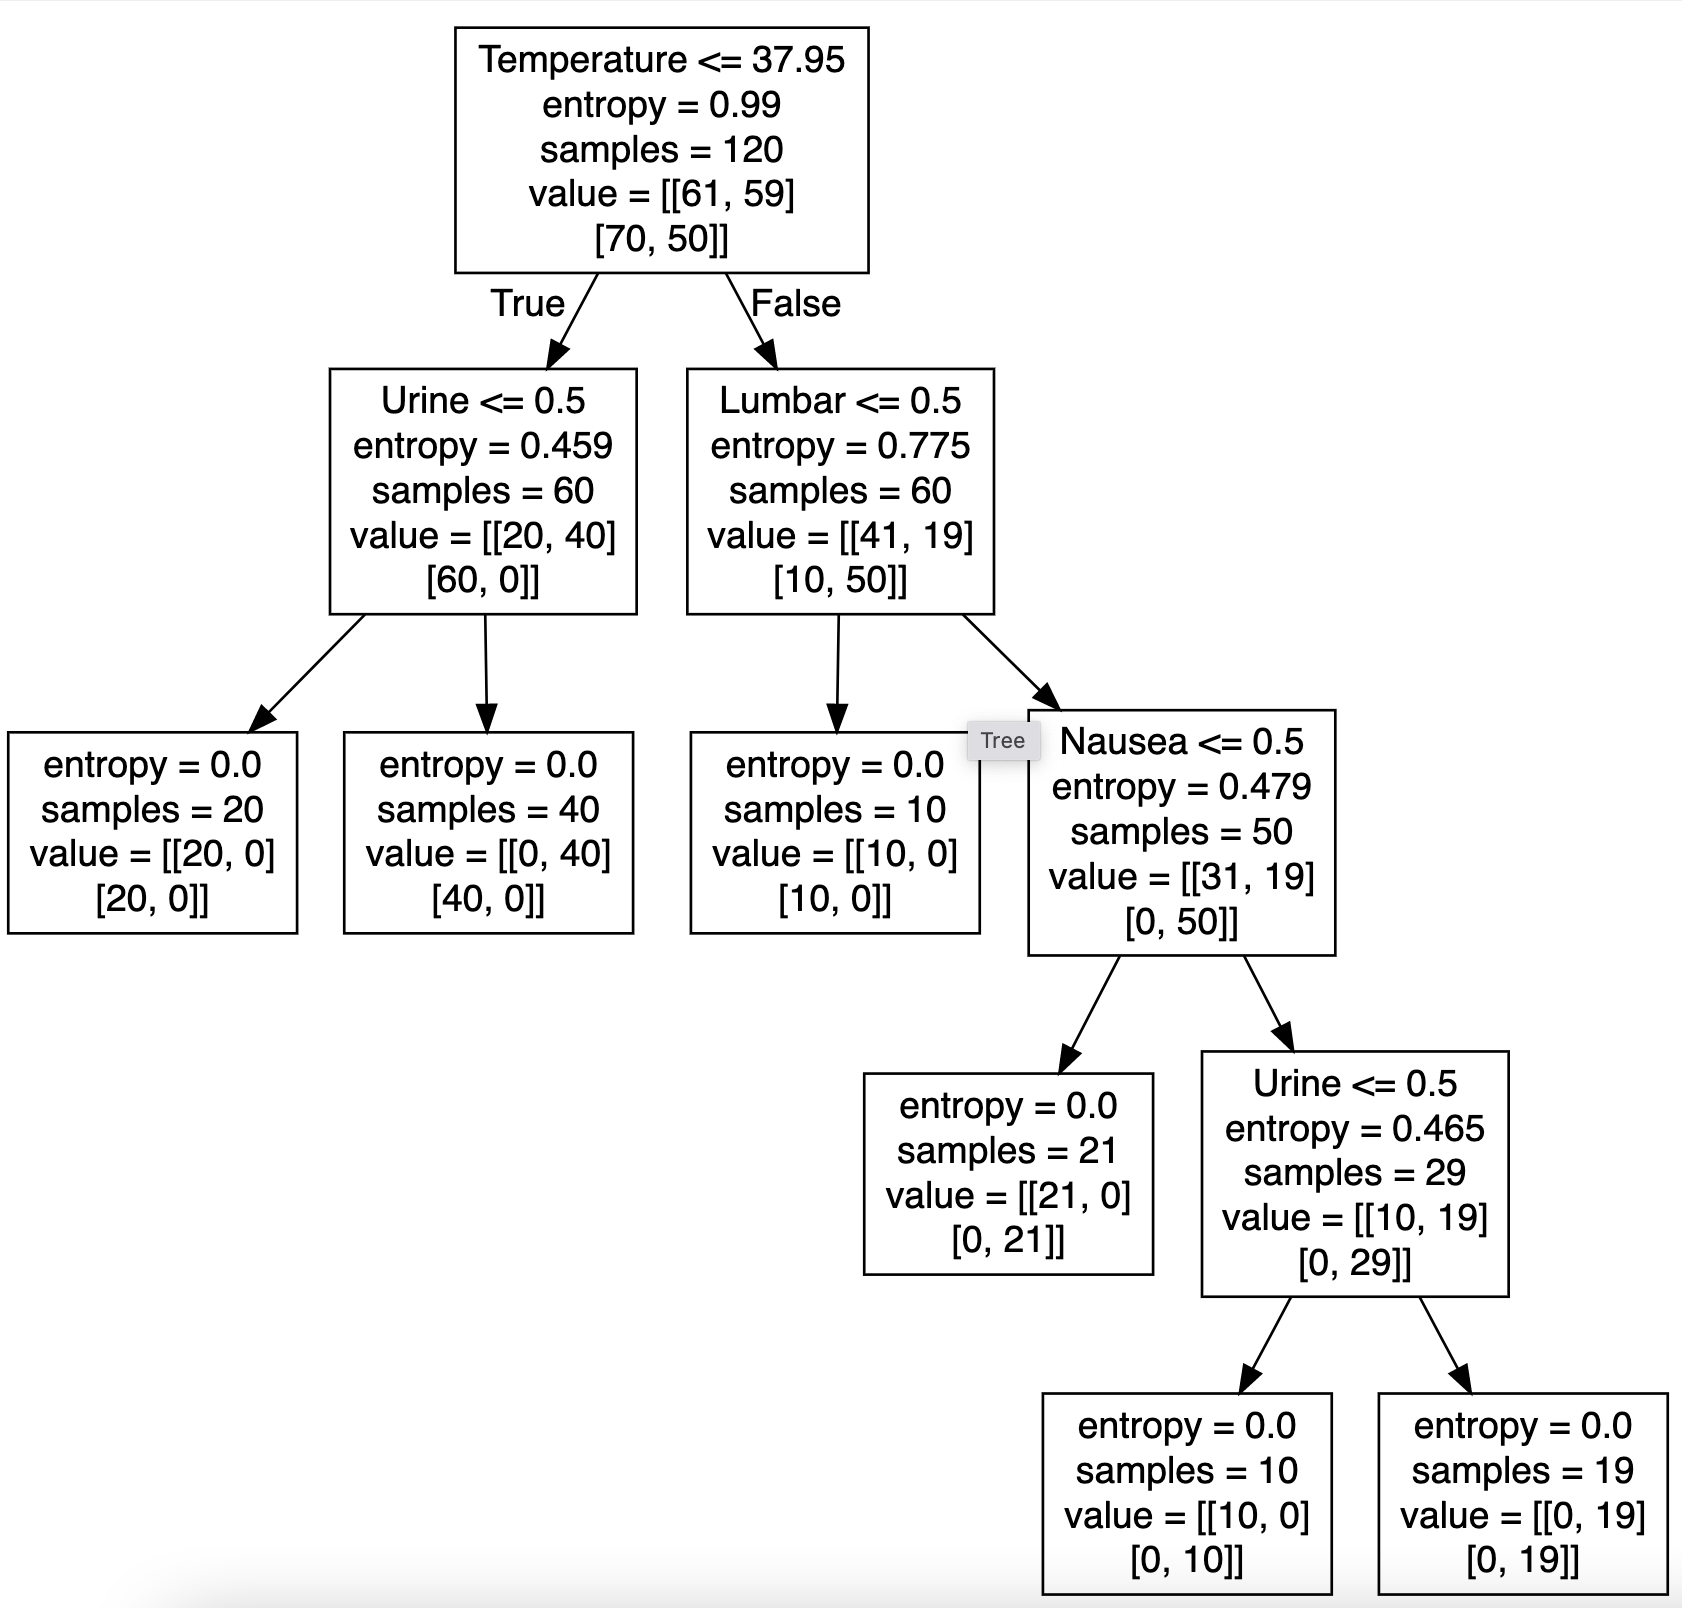

# C) Convert the decision rules into a set of IF-THEN rules

In [19]:
from sklearn.tree import _tree

def tree_to_code(tree, feature_names):
	"""
	Outputs a decision tree model as a Python function
	
	Parameters:
	-----------
	tree: decision tree model
		The decision tree to represent as a function
	feature_names: list
		The feature names of the dataset used for building the decision tree
	"""

	tree_ = tree.tree_
	feature_name = [
		feature_names[i] if i != _tree.TREE_UNDEFINED else "undefined!"
		for i in tree_.feature
	]
	print("def tree({}):".format(", ".join(feature_names)))

	def recurse(node, depth):
		indent = "  " * depth
		if tree_.feature[node] != _tree.TREE_UNDEFINED:
			name = feature_name[node]
			threshold = tree_.threshold[node]
			print("{}if {} <= {}:".format(indent, name, threshold))
			recurse(tree_.children_left[node], depth + 1)
			print("{}else:  # if {} > {}".format(indent, name, threshold))
			recurse(tree_.children_right[node], depth + 1)
		else:
			print("{}return {}".format(indent, tree_.value[node]))

	recurse(0, 1)

tree_to_code(dt, ['Temperature', 'Nausea','Lumbar','Urine','Micturition','Urethra'])


def tree(Temperature, Nausea, Lumbar, Urine, Micturition, Urethra):
  if Temperature <= 37.95000076293945:
    if Urine <= 0.5:
      return [[20.  0.]
 [20.  0.]]
    else:  # if Urine > 0.5
      return [[ 0. 40.]
 [40.  0.]]
  else:  # if Temperature > 37.95000076293945
    if Lumbar <= 0.5:
      return [[10.  0.]
 [10.  0.]]
    else:  # if Lumbar > 0.5
      if Micturition <= 0.5:
        return [[21.  0.]
 [ 0. 21.]]
      else:  # if Micturition > 0.5
        if Urine <= 0.5:
          return [[10.  0.]
 [ 0. 10.]]
        else:  # if Urine > 0.5
          return [[ 0. 19.]
 [ 0. 19.]]


# 1d) Use cost-complexity pruning to find a minimal decision tree and a set of decision rules with high interpretability.

In [20]:
params = {"criterion": ["entropy"],
       
              "ccp_alpha": list(np.linspace(0,10,50))
              }



In [21]:
clf = DecisionTreeClassifier()
clf.fit(X,y)
path = clf.cost_complexity_pruning_path(X, y)



In [22]:
cv = GridSearchCV(clf, param_grid = params)

In [23]:
cv.fit(X,y)

GridSearchCV(estimator=DecisionTreeClassifier(),
             param_grid={'ccp_alpha': [0.0, 0.20408163265306123,
                                       0.40816326530612246, 0.6122448979591837,
                                       0.8163265306122449, 1.0204081632653061,
                                       1.2244897959183674, 1.4285714285714286,
                                       1.6326530612244898, 1.836734693877551,
                                       2.0408163265306123, 2.2448979591836737,
                                       2.4489795918367347, 2.6530612244897958,
                                       2.857142857142857, 3.0612244897959187,
                                       3.2653061224489797, 3.4693877551020407,
                                       3.673469387755102, 3.8775510204081636,
                                       4.081632653061225, 4.285714285714286,
                                       4.4897959183673475, 4.6938775510204085,
                     

In [24]:
print(cv.best_params_)


{'ccp_alpha': 0.0, 'criterion': 'entropy'}


In [25]:
print(cv.best_score_)


0.95


# 2 Lasso and Boosting for Regression

# a) Download the Communities and Crime data from https://archive.ics.uci.edu/ml/datasets/Communities+and+Crime. Use the first 1495 rows of data a the training set and the rest as the test set

# b) The data set has missing values. Use a data imputation technique to deal with the missing values in the data set. The data description mentions some features are nonpredictive. Ignore those features

In [26]:
df = pd.read_csv("data/communities.data", header = None, na_values = "?")
df

,0,1,2,3,4,5,6,7,8,9,...,118,119,120,121,122,123,124,125,126,127
0,8,NaN,NaN,Lakewoodcity,1,0.19,0.33,0.02,0.90,0.12,...,0.12,0.26,0.20,0.06,0.04,0.90,0.5,0.32,0.14,0.20
1,53,NaN,NaN,Tukwilacity,1,0.00,0.16,0.12,0.74,0.45,...,0.02,0.12,0.45,NaN,NaN,NaN,NaN,0.00,NaN,0.67
2,24,NaN,NaN,Aberdeentown,1,0.00,0.42,0.49,0.56,0.17,...,0.01,0.21,0.02,NaN,NaN,NaN,NaN,0.00,NaN,0.43
3,34,5.0,81440.0,Willingborotownship,1,0.04,0.77,1.00,0.08,0.12,...,0.02,0.39,0.28,NaN,NaN,NaN,NaN,0.00,NaN,0.12
4,42,95.0,6096.0,Bethlehemtownship,1,0.01,0.55,0.02,0.95,0.09,...,0.04,0.09,0.02,NaN,NaN,NaN,NaN,0.00,NaN,0.03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1989,12,NaN,NaN,TempleTerracecity,10,0.01,0.40,0.10,0.87,0.12,...,0.01,0.28,0.05,NaN,NaN,NaN,NaN,0.00,NaN,0.09
1990,6,NaN,NaN,Seasidecity,10,0.05,0.96,0.46,0.28,0.83,...,0.02,0.37,0.20,NaN,NaN,NaN,NaN,0.00,NaN,0.45
1991,9,9.0,80070.0,Waterburytown,10,0.16,0.37,0.25,0.69,0.04,...,0.08,0.32,0.18,0.08,0.06,0.78,0.0,0.91,0.28,0.23
1992,25,17.0,72600.0,Walthamcity,10,0.08,0.51,0.06,0.87,0.22,...,0.03,0.38,0.33,0.02,0.02,0.79,0.0,0.22,0.18,0.19


In [27]:
df2=df.drop([0,1,2,3,4], axis=1)


In [28]:
df3 = df2.fillna(df2.mean())


In [29]:
df = df3

In [30]:
df

,5,6,7,8,9,10,11,12,13,14,...,118,119,120,121,122,123,124,125,126,127
0,0.19,0.33,0.02,0.90,0.12,0.17,0.34,0.47,0.29,0.32,...,0.12,0.26,0.20,0.060000,0.040000,0.900000,0.500000,0.32,0.140000,0.20
1,0.00,0.16,0.12,0.74,0.45,0.07,0.26,0.59,0.35,0.27,...,0.02,0.12,0.45,0.163103,0.076708,0.698589,0.440439,0.00,0.195078,0.67
2,0.00,0.42,0.49,0.56,0.17,0.04,0.39,0.47,0.28,0.32,...,0.01,0.21,0.02,0.163103,0.076708,0.698589,0.440439,0.00,0.195078,0.43
3,0.04,0.77,1.00,0.08,0.12,0.10,0.51,0.50,0.34,0.21,...,0.02,0.39,0.28,0.163103,0.076708,0.698589,0.440439,0.00,0.195078,0.12
4,0.01,0.55,0.02,0.95,0.09,0.05,0.38,0.38,0.23,0.36,...,0.04,0.09,0.02,0.163103,0.076708,0.698589,0.440439,0.00,0.195078,0.03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1989,0.01,0.40,0.10,0.87,0.12,0.16,0.43,0.51,0.35,0.30,...,0.01,0.28,0.05,0.163103,0.076708,0.698589,0.440439,0.00,0.195078,0.09
1990,0.05,0.96,0.46,0.28,0.83,0.32,0.69,0.86,0.73,0.14,...,0.02,0.37,0.20,0.163103,0.076708,0.698589,0.440439,0.00,0.195078,0.45
1991,0.16,0.37,0.25,0.69,0.04,0.25,0.35,0.50,0.31,0.54,...,0.08,0.32,0.18,0.080000,0.060000,0.780000,0.000000,0.91,0.280000,0.23
1992,0.08,0.51,0.06,0.87,0.22,0.10,0.58,0.74,0.63,0.41,...,0.03,0.38,0.33,0.020000,0.020000,0.790000,0.000000,0.22,0.180000,0.19


In [31]:
NAMES= ["population",
 "householdsize",
 "racepctblack",
 "racePctWhite",
 "racePctAsian", 
 "racePctHisp", 
 "agePct12t21", 
 "agePct12t29", 
 "agePct16t24", 
 "agePct65up", 
 "numbUrban", 
 "pctUrban", 
 "medIncome", 
 "pctWWage",
 "pctWFarmSelf",
 "pctWInvInc", 
 "pctWSocSec", 
 "pctWPubAsst", 
 "pctWRetire", 
 "medFamInc", 
 "perCapInc", 
 "whitePerCap",
 "blackPerCap", 
 "indianPerCap", 
 "AsianPerCap", 
 "OtherPerCap", 
 "HispPerCap", 
 "NumUnderPov", 
 "PctPopUnderPov", 
 "PctLess9thGrade", 
 "PctNotHSGrad", 
 "PctBSorMore", 
 "PctUnemployed", 
 "PctEmploy", 
 "PctEmplManu", 
 "PctEmplProfServ",
 "PctOccupManu", 
 "PctOccupMgmtProf", 
 "MalePctDivorce", 
 "MalePctNevMarr", 
 "FemalePctDiv", 
 "TotalPctDiv",
 "PersPerFam", 
 "PctFam2Par", 
 "PctKids2Par", 
 "PctYoungKids2Par", 
 "PctTeen2Par", 
 "PctWorkMomYoungKids", 
 "PctWorkMom", 
 "NumIlleg", 
 "PctIlleg", 
 "NumImmig", 
 "PctImmigRecent", 
 "PctImmigRec5", 
 "PctImmigRec8", 
 "PctImmigRec10", 
 "PctRecentImmig", 
 "PctRecImmig5", 
 "PctRecImmig8",
 "PctRecImmig10",
 "PctSpeakEnglOnly",
 "PctNotSpeakEnglWell", 
 "PctLargHouseFam", 
 "PctLargHouseOccup", 
 "PersPerOccupHous", 
 "PersPerOwnOccHous", 
 "PersPerRentOccHous", 
 "PctPersOwnOccup", 
 "PctPersDenseHous", 
 "PctHousLess3BR", 
 "MedNumBR", 
 "HousVacant", 
 "PctHousOccup",
 "PctHousOwnOcc", 
 "PctVacantBoarded", 
 "PctVacMore6Mos", 
 "MedYrHousBuilt", 
 "PctHousNoPhone", 
 "PctWOFullPlumb", 
 "OwnOccLowQuart", 
 "OwnOccMedVal", 
 "OwnOccHiQuart", 
 "RentLowQ", 
 "RentMedian", 
 "RentHighQ", 
 "MedRent", 
 "MedRentPctHousInc",
 "MedOwnCostPctInc", 
 "MedOwnCostPctIncNoMtg", 
 "NumInShelters", 
 "NumStreet", 
 "PctForeignBorn",
 "PctBornSameState", 
 "PctSameHouse85", 
 "PctSameCity85", 
 "PctSameState85", 
 "LemasSwornFT", 
 "LemasSwFTPerPop",
 "LemasSwFTFieldOps",
 "LemasSwFTFieldPerPop", 
 "LemasTotalReq", 
 "LemasTotReqPerPop", 
 "PolicReqPerOffic", 
 "PolicPerPop", 
 "RacialMatchCommPol",
 "PctPolicWhite", 
 "PctPolicBlack", 
 "PctPolicHisp",
 "PctPolicAsian", 
 "PctPolicMinor", 
 "OfficAssgnDrugUnits",
 "NumKindsDrugsSeiz",
 "PolicAveOTWorked", 
 "LandArea", 
 "PopDens", 
 "PctUsePubTrans", 
 "PolicCars", 
 "PolicOperBudg",
 "LemasPctPolicOnPatr", 
 "LemasGangUnitDeploy", 
 "LemasPctOfficDrugUn", 
 "PolicBudgPerPop", 
 "ViolentCrimesPerPop"]

df.columns = NAMES
df

df_train = df.iloc[0:1495,]
df_test= df.iloc[1496:,]

# C) Plot a correlation matrix for the features in the data set

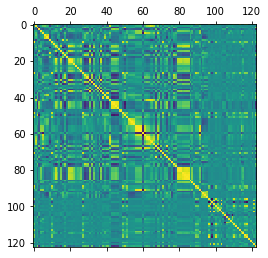

In [32]:
plt.matshow(df.corr())


# d) Calculate the Coefficient of Variation CV for each feature, where CV= s/m in which s is sample standard deviation and is sample mean

In [33]:
features = df.values

#https://www.w3schools.com/python/python_lambda.asp
CV =  lambda a: np.var(a) / np.mean(a)

#https://www.geeksforgeeks.org/numpy-apply_along_axis-python/

var = np.apply_along_axis(CV, axis=0, arr=features)
var

array([0.27949709, 0.05781184, 0.35740724, 0.07897583, 0.28375598,
       0.37511785, 0.05674831, 0.04171196, 0.08240513, 0.07583656,
       0.25660718, 0.2840242 , 0.12131775, 0.05991231, 0.1428098 ,
       0.06393799, 0.06394856, 0.15520249, 0.05855745, 0.10457394,
       0.1042229 , 0.09476531, 0.10109828, 0.13334926, 0.11839746,
       0.12800233, 0.08672932, 0.29475188, 0.17217858, 0.14407348,
       0.10692853, 0.12093681, 0.1123777 , 0.06041726, 0.10328247,
       0.06983642, 0.10109347, 0.07859542, 0.07214208, 0.0708081 ,
       0.06290215, 0.0681698 , 0.04897477, 0.0667421 , 0.06857315,
       0.07202554, 0.06288824, 0.05666694, 0.05827746, 0.32521918,
       0.21139902, 0.25276598, 0.14982539, 0.12330565, 0.10168732,
       0.08879655, 0.30639888, 0.3065194 , 0.30316564, 0.30136861,
       0.06545816, 0.32041967, 0.14431306, 0.14431476, 0.06217954,
       0.05041678, 0.08863426, 0.06900817, 0.23654416, 0.06006662,
       0.20681986, 0.29457908, 0.05229178, 0.06248259, 0.23175

# d) Pick √128 features with highestCV and make scatter plots and box plots for them.

In [34]:

columns =df.columns.values
columns_features=pd.DataFrame(np.column_stack([columns, var]))
# Dropping the id coloumn
columns_features=columns_features.drop(0)

sort = columns_features.sort_values(1, ascending=False)
print("Coeficients of coloumns")
print(sort)

top_floor= sort.head(int(math.floor(math.sqrt(128))))
selected_colomuns = df[top_floor[0]]
print("Top 11 Coloumns ")
print(top_floor)


Coeficients of coloumns
                       0           1
120  LemasPctOfficDrugUn    0.613795
90             NumStreet    0.442312
5            racePctHisp    0.375118
89         NumInShelters    0.357454
2           racepctblack    0.357407
..                   ...         ...
104   RacialMatchCommPol   0.0119003
111    NumKindsDrugsSeiz   0.0118397
105        PctPolicWhite   0.0107543
118  LemasPctPolicOnPatr   0.0104491
98     LemasSwFTFieldOps  0.00301627

[122 rows x 2 columns]
Top 11 Coloumns 
                       0         1
120  LemasPctOfficDrugUn  0.613795
90             NumStreet  0.442312
5            racePctHisp  0.375118
89         NumInShelters  0.357454
2           racepctblack  0.357407
49              NumIlleg  0.325219
115       PctUsePubTrans  0.324333
61   PctNotSpeakEnglWell   0.32042
57          PctRecImmig5  0.306519
56        PctRecentImmig  0.306399
58          PctRecImmig8  0.303166


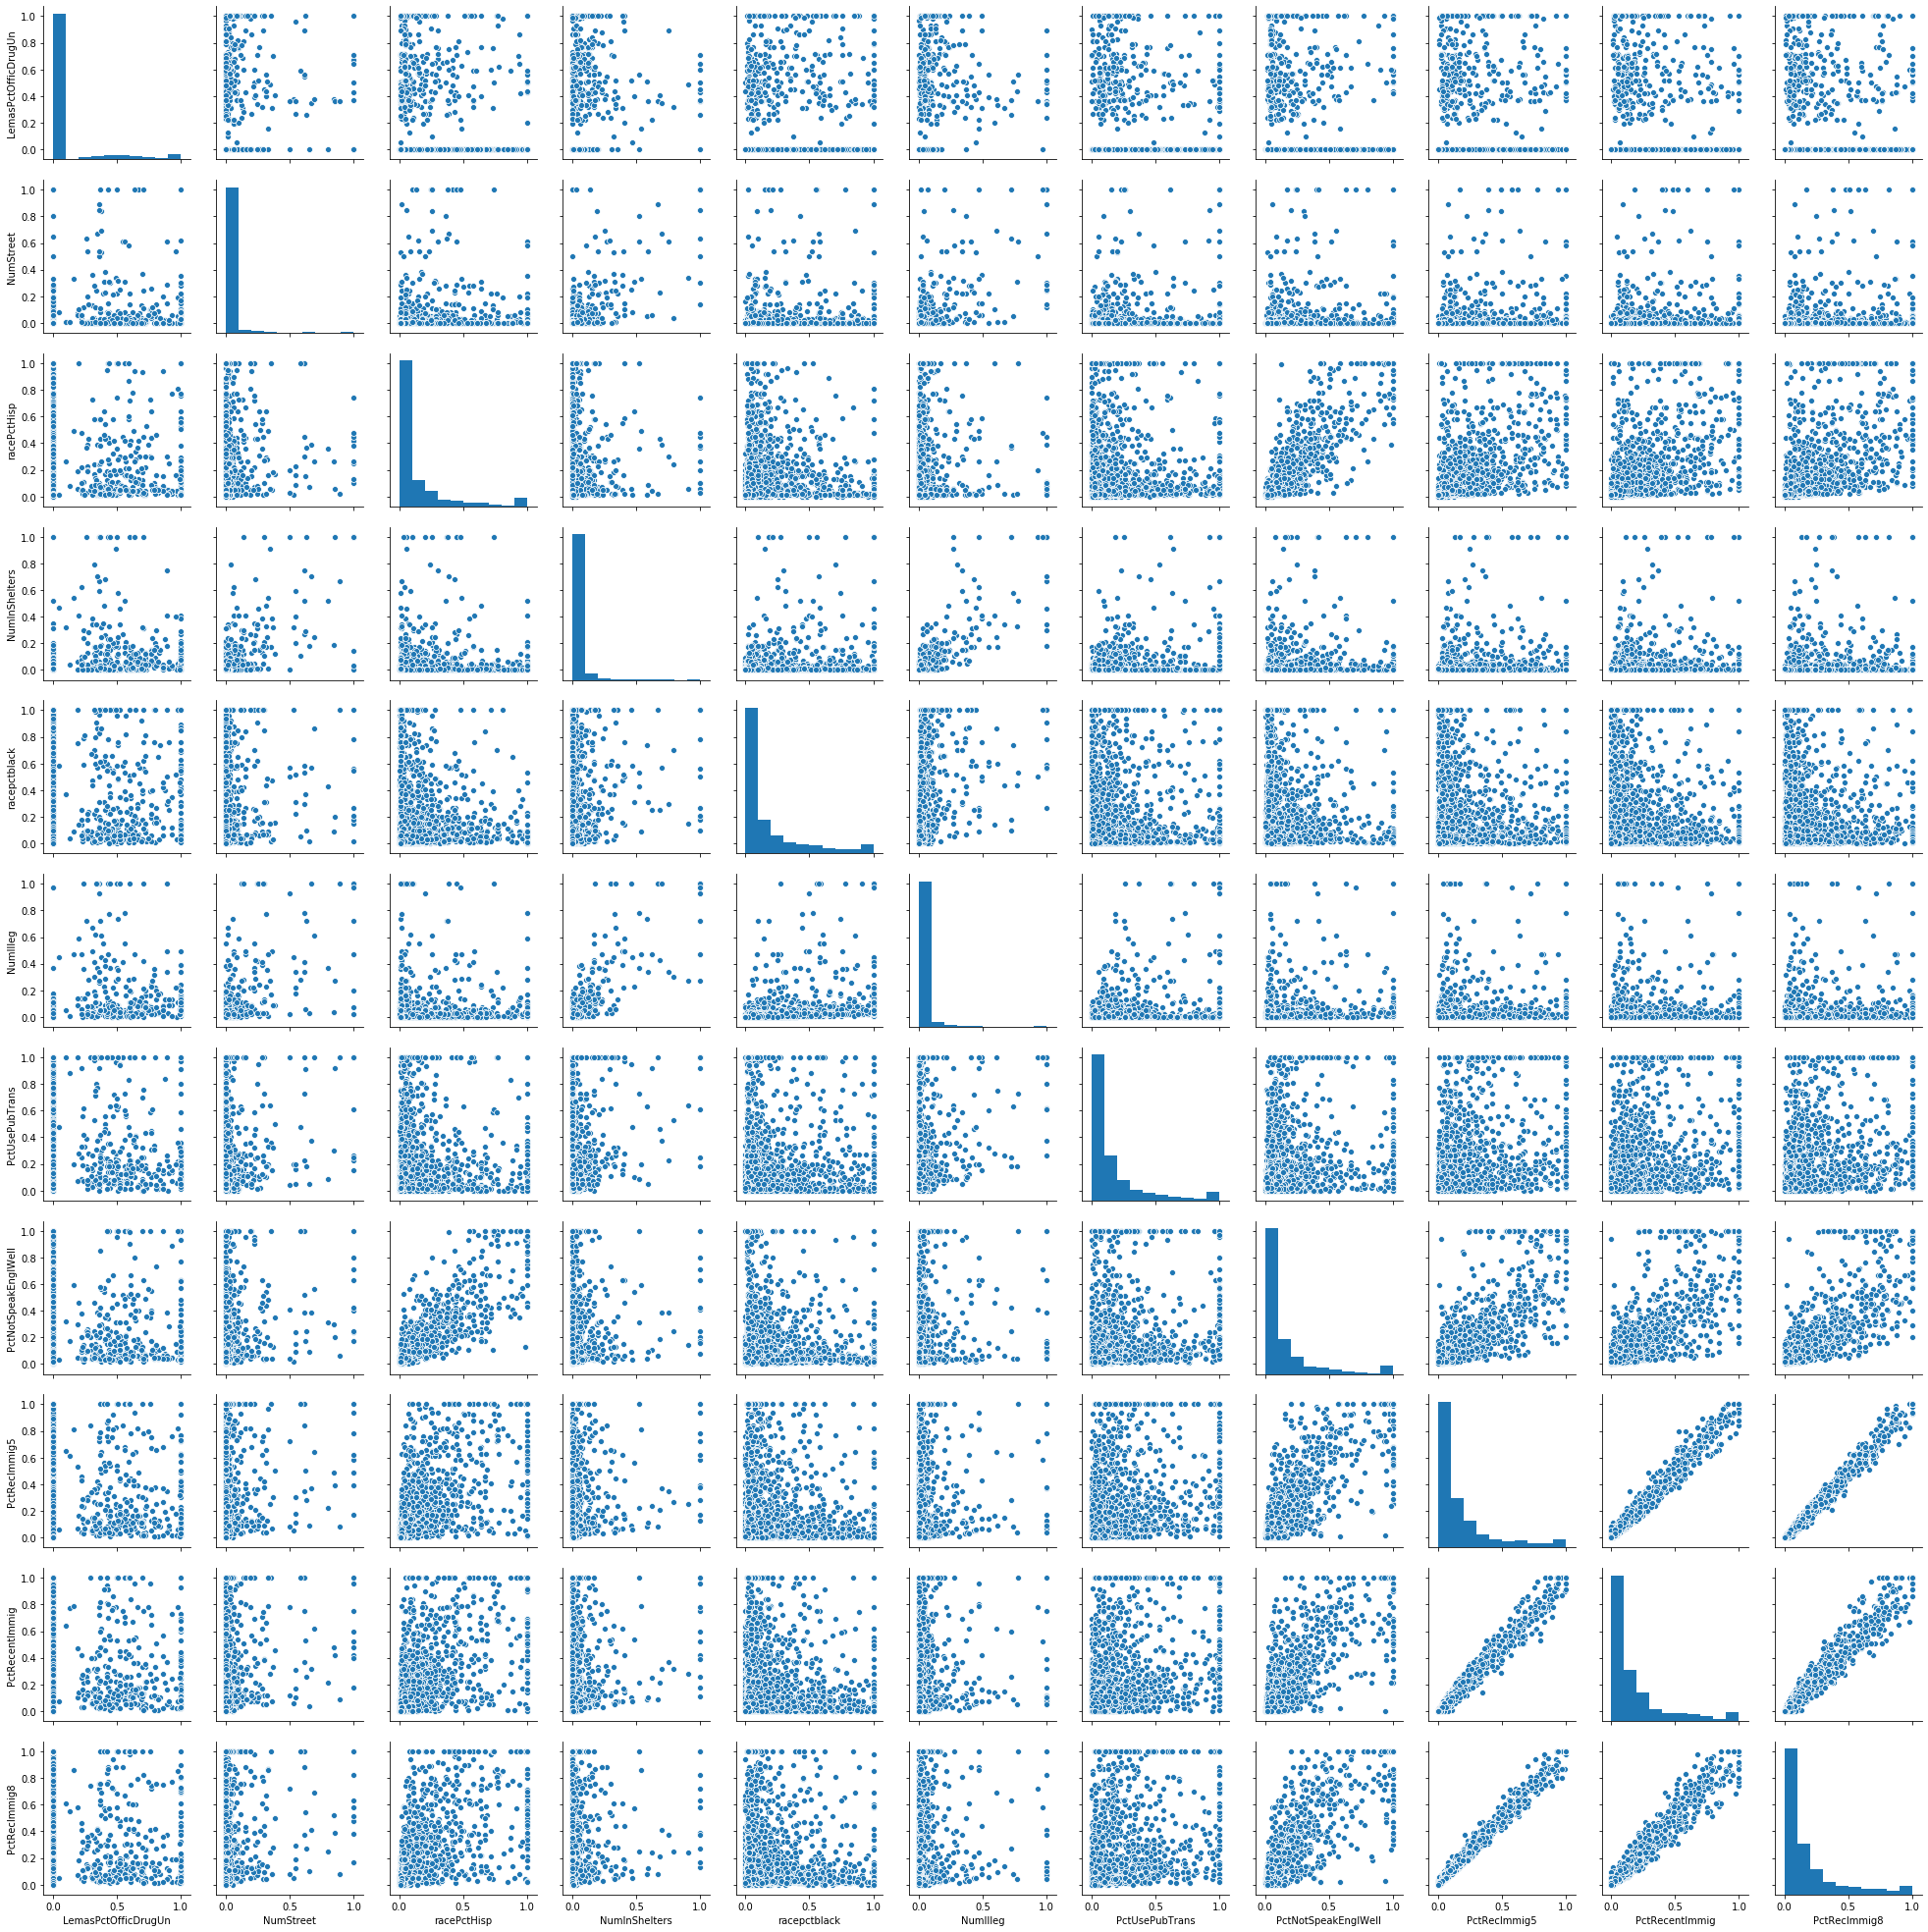

In [35]:
sns.pairplot(selected_colomuns)


# we can see that majority of features are uncorrelated

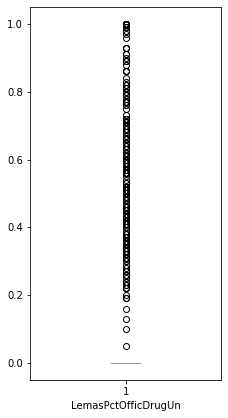

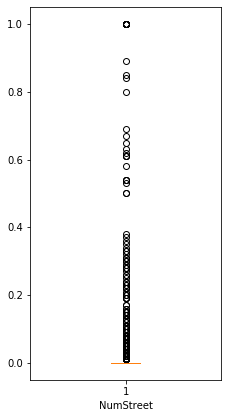

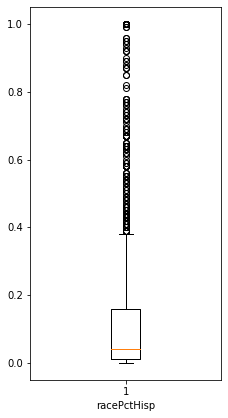

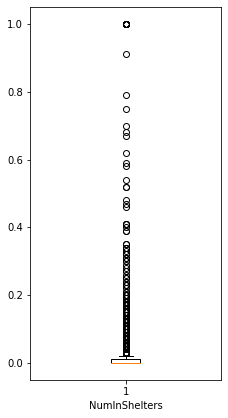

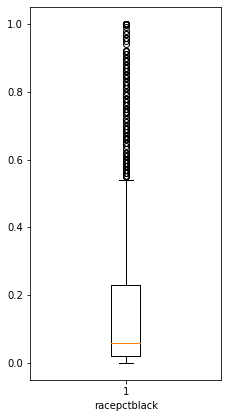

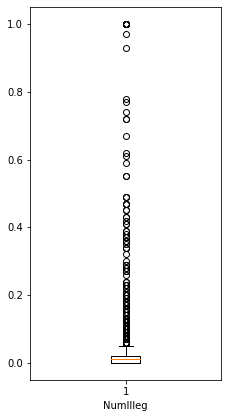

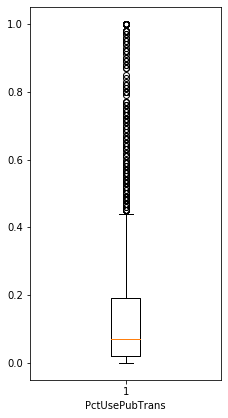

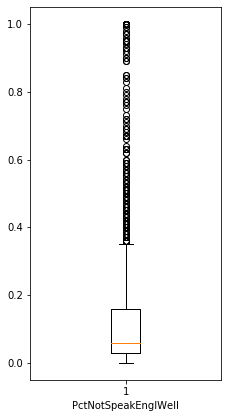

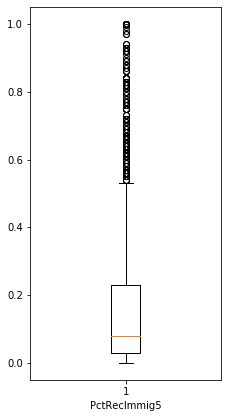

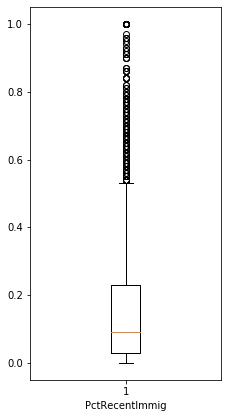

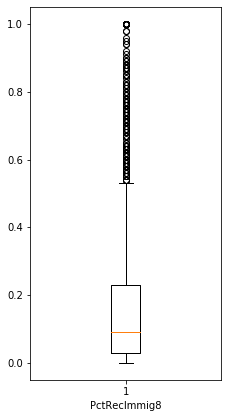

In [36]:
Bplots = selected_colomuns.columns
a=1
#https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.subplots.html
for column in Bplots:
    plt.subplots(figsize=(24, 48))
    plt.subplot(6,6,a)
    plt.xlabel(column)
    plt.boxplot(selected_colomuns[column])
    a=a+1

# f) Fit a linear model using least squares to the training set and report the test error.

In [37]:
#training set
df_train_x = df_train.iloc[:,:121]
df_train_y = df_train.iloc[:,122:123]

#test set
df_test_x = df_test.iloc[:,:121]
df_test_y = df_test.iloc[:,122:123] 


In [38]:
df_train_x

,population,householdsize,racepctblack,racePctWhite,racePctAsian,racePctHisp,agePct12t21,agePct12t29,agePct16t24,agePct65up,...,NumKindsDrugsSeiz,PolicAveOTWorked,LandArea,PopDens,PctUsePubTrans,PolicCars,PolicOperBudg,LemasPctPolicOnPatr,LemasGangUnitDeploy,LemasPctOfficDrugUn
0,0.19,0.33,0.02,0.90,0.12,0.17,0.34,0.47,0.29,0.32,...,0.57000,0.290000,0.12,0.26,0.20,0.060000,0.040000,0.900000,0.500000,0.32
1,0.00,0.16,0.12,0.74,0.45,0.07,0.26,0.59,0.35,0.27,...,0.55605,0.305987,0.02,0.12,0.45,0.163103,0.076708,0.698589,0.440439,0.00
2,0.00,0.42,0.49,0.56,0.17,0.04,0.39,0.47,0.28,0.32,...,0.55605,0.305987,0.01,0.21,0.02,0.163103,0.076708,0.698589,0.440439,0.00
3,0.04,0.77,1.00,0.08,0.12,0.10,0.51,0.50,0.34,0.21,...,0.55605,0.305987,0.02,0.39,0.28,0.163103,0.076708,0.698589,0.440439,0.00
4,0.01,0.55,0.02,0.95,0.09,0.05,0.38,0.38,0.23,0.36,...,0.55605,0.305987,0.04,0.09,0.02,0.163103,0.076708,0.698589,0.440439,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1490,0.00,0.59,0.01,0.69,1.00,0.07,0.41,0.28,0.23,0.57,...,0.55605,0.305987,0.02,0.14,0.22,0.163103,0.076708,0.698589,0.440439,0.00
1491,0.16,0.62,0.03,0.74,0.48,0.42,0.44,0.57,0.40,0.25,...,0.57000,0.380000,0.07,0.40,0.14,0.070000,0.050000,0.850000,0.500000,0.61
1492,0.01,0.36,0.95,0.24,0.03,0.01,0.44,0.42,0.27,0.63,...,0.55605,0.305987,0.03,0.12,0.01,0.163103,0.076708,0.698589,0.440439,0.00
1493,0.06,0.53,0.01,0.98,0.05,0.01,0.40,0.40,0.24,0.29,...,0.55605,0.305987,0.08,0.15,0.02,0.163103,0.076708,0.698589,0.440439,0.00


In [39]:
df_test_x

,population,householdsize,racepctblack,racePctWhite,racePctAsian,racePctHisp,agePct12t21,agePct12t29,agePct16t24,agePct65up,...,NumKindsDrugsSeiz,PolicAveOTWorked,LandArea,PopDens,PctUsePubTrans,PolicCars,PolicOperBudg,LemasPctPolicOnPatr,LemasGangUnitDeploy,LemasPctOfficDrugUn
1496,0.00,0.55,0.13,0.78,0.15,0.36,0.48,0.53,0.30,0.10,...,0.55605,0.305987,0.01,0.18,0.02,0.163103,0.076708,0.698589,0.440439,0.00
1497,0.00,0.52,0.04,0.59,0.05,0.62,0.84,0.78,0.75,0.43,...,0.55605,0.305987,0.01,0.18,0.00,0.163103,0.076708,0.698589,0.440439,0.00
1498,0.04,0.51,0.07,0.92,0.09,0.03,0.38,0.47,0.27,0.35,...,0.55605,0.305987,0.06,0.13,0.16,0.163103,0.076708,0.698589,0.440439,0.00
1499,0.03,0.59,0.20,0.75,0.19,0.10,0.38,0.62,0.35,0.11,...,0.55605,0.305987,0.03,0.23,0.06,0.163103,0.076708,0.698589,0.440439,0.00
1500,0.01,0.48,0.02,0.77,0.84,0.05,0.37,0.26,0.20,0.50,...,0.55605,0.305987,0.01,0.23,0.05,0.163103,0.076708,0.698589,0.440439,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1989,0.01,0.40,0.10,0.87,0.12,0.16,0.43,0.51,0.35,0.30,...,0.55605,0.305987,0.01,0.28,0.05,0.163103,0.076708,0.698589,0.440439,0.00
1990,0.05,0.96,0.46,0.28,0.83,0.32,0.69,0.86,0.73,0.14,...,0.55605,0.305987,0.02,0.37,0.20,0.163103,0.076708,0.698589,0.440439,0.00
1991,0.16,0.37,0.25,0.69,0.04,0.25,0.35,0.50,0.31,0.54,...,0.36000,0.250000,0.08,0.32,0.18,0.080000,0.060000,0.780000,0.000000,0.91
1992,0.08,0.51,0.06,0.87,0.22,0.10,0.58,0.74,0.63,0.41,...,0.57000,0.190000,0.03,0.38,0.33,0.020000,0.020000,0.790000,0.000000,0.22


In [40]:
df_train_y

,ViolentCrimesPerPop
0,0.20
1,0.67
2,0.43
3,0.12
4,0.03
...,...
1490,0.03
1491,0.20
1492,0.30
1493,0.03


In [41]:
df_test_y

,ViolentCrimesPerPop
1496,0.11
1497,0.12
1498,0.06
1499,0.12
1500,0.04
...,...
1989,0.09
1990,0.45
1991,0.23
1992,0.19


In [42]:
linear_regression = linear_model.LinearRegression()
regression_fit =  linear_regression.fit(df_train_x, df_train_y)
y_pred = regression_fit.predict(df_test_x)
linear_regression_mse = mean_squared_error(y_pred,df_test_y)

In [43]:
print("Linear Regression MSE",linear_regression_mse)


Linear Regression MSE 0.8460717688075051


#### Linear Regression MSE 0.8460717688075051

# g) Fit a ridge regression model on the training set, with λ chosen by cross-validation. Report the test error obtained.

In [44]:

scaled = pd.DataFrame(scale(df))
Scaled_train = scaled.iloc[0:1495,]
Scaled_test= scaled.iloc[1496:,]
Scaled_train_x = Scaled_train.iloc[:,:121]
Scaled_test_x = Scaled_test.iloc[::,:121]
Scaled_train_y = Scaled_train.iloc[:,122:123] 
Scaled_test_y = Scaled_test.iloc[:,122:123]
clf = RidgeCV(alphas=np.linspace(0.0000001,100,1000),normalize=True).fit(Scaled_train_x, Scaled_train_y)
scalpredridge= clf.predict(Scaled_train_x)
ridgealpa = clf.alpha_


print("Best Lambda: ",ridgealpa)

Best Lambda:  0.10010020000000001


In [45]:
clf = RidgeCV(alphas=[0.10010020000000001],normalize=True).fit(df_train_x, df_train_y)
y_pred_ridge= clf.predict(df_test_x)
ridge_MSE =mean_squared_error(df_test_y,y_pred_ridge)

print("Ridge Regression Test Error: ",ridge_MSE)
print("Ridge Regression Score: ",clf.score(df_test_x,df_test_y) )

Ridge Regression Test Error:  0.017485364917210807
Ridge Regression Score:  0.6328640441174074


#### Ridge Regression MSE = 0.017782262178926145

# h) Lasso Model

In [46]:
Lasso = LassoCV(cv=5,random_state=0,tol=0.001).fit(df_train_x,df_train_y.values.ravel())
Lasso.score(df_test_x,df_test_y)
coefficents =Lasso.coef_
predlasso= Lasso.predict(df_test_x)
Lasso_MSE =mean_squared_error(df_test_y,predlasso)
print("Test Error of Lasso regression ",Lasso_MSE)
print("++++++++++++++++++++++++++++++++++++")
print("coefficients",coefficents)

Test Error of Lasso regression  0.017782262178926145
++++++++++++++++++++++++++++++++++++
coefficients [-0.00000000e+00  0.00000000e+00  2.71104444e-01 -0.00000000e+00
 -1.51856981e-02  0.00000000e+00  6.70061567e-02 -2.66688804e-01
  0.00000000e+00  0.00000000e+00 -0.00000000e+00  4.05110781e-02
  0.00000000e+00 -8.05790835e-02  2.64996216e-02 -9.64788547e-02
  4.98701790e-02  3.81140024e-02 -1.08063963e-01  0.00000000e+00
 -0.00000000e+00 -5.76616163e-02 -2.09943940e-02 -3.10686013e-02
  2.90719437e-02  2.27436711e-02  2.39225266e-02 -0.00000000e+00
 -1.39855358e-01 -1.74905826e-02  0.00000000e+00  0.00000000e+00
 -0.00000000e+00  1.35861838e-01 -1.62789905e-02  0.00000000e+00
  1.12696093e-02  0.00000000e+00  1.17518364e-01  1.33235952e-01
 -7.62404028e-02 -0.00000000e+00  0.00000000e+00 -0.00000000e+00
 -1.97002538e-01 -3.75553920e-02 -9.77860417e-03  0.00000000e+00
 -1.29634539e-01 -5.63928671e-02  9.92759319e-02 -6.94233752e-02
 -3.41900035e-05 -0.00000000e+00 -0.00000000e+00 -5.

In [47]:
lasso_columns = df_train_x.columns.values

lasso_tables =pd.DataFrame(np.column_stack([lasso_columns, coefficents]))

variables_filtered = lasso_tables.loc[lasso_tables[1] != 0 ]

variables_filtered

,0,1
2,racepctblack,0.271104
4,racePctAsian,-0.0151857
6,agePct12t21,0.0670062
7,agePct12t29,-0.266689
11,pctUrban,0.0405111
...,...,...
114,PopDens,0.0101361
115,PctUsePubTrans,-0.0438257
118,LemasPctPolicOnPatr,0.0237146
119,LemasGangUnitDeploy,0.0405327


In [48]:
#https://machinelearningmastery.com/lasso-regression-with-python/
scaled = pd.DataFrame(scale(df))
Scaled_df_train = scaled.iloc[0:1495,]
Scaled_df_test= scaled.iloc[1496:,]
Scaled_train_x = Scaled_df_train.iloc[:,:122]
Scaled_test_x = Scaled_df_test.iloc[:,:122]
Scaled_train_y = Scaled_df_train.iloc[:,122:123] 
Scaled_test_y = Scaled_df_test.iloc[:,122:123]

X_Lasso_train = Scaled_train_x[variables_filtered.index]
X_Lasso_test  = Scaled_test_x[variables_filtered.index]
regfilt = LassoCV(cv=5,random_state=0,tol=0.001).fit(X_Lasso_train,Scaled_train_y.values.ravel())
y_pred_lasso= regfilt.predict(X_Lasso_test)
Lasso_MSE =mean_squared_error(Scaled_test_y,y_pred_lasso)

print("normalized Test Error: ",Lasso_MSE)

normalized Test Error:  0.3355024398628264


# i) PCR Model

In [49]:
lasso_mse = []

for comp in range(1,122):
    pca = PCA(n_components=comp)
    X_PCA = pca.fit_transform(scale(df_train_x))
    K_Fold = KFold(n_splits=5)
    MSE = []
    for train_ind,val_ind in K_Fold.split(X_PCA):
        x_train, x_value = X_PCA[train_ind.tolist()], X_PCA[val_ind.tolist()]
        y_train, y_value = np.array(df_train_y)[train_ind.tolist()], np.array(df_train_y)[val_ind.tolist()]
        model = linear_model.LinearRegression()
        model = model.fit(x_train,y_train)
        pred = model.predict(x_value)
        actual = y_value
        test_error = mean_squared_error(actual, pred)
        MSE.append(test_error)
    lasso_mse.append(np.mean(MSE))


In [50]:
minvalue_series = pd.DataFrame({"Components": range(0,121),"MSE":lasso_mse})
#minvalue_series.to_csv("Min.csv")

In [51]:
min_ = minvalue_series.min(skipna = False)
print(min_)

Components    0.000000
MSE           0.019409
dtype: float64


#### Test error with lambda chosen with cross validation = 0.019407

#### Test error with normalized features = 0.3355024398628264

#### The test error when lambda is chosen with cross validation proudces a lower Test MSE

In [52]:
pca = PCA(n_components=91)
X_PCA_train = pca.fit_transform(scale(df_train_x))
X_PCA_test = pca.fit_transform(scale(df_test_x))

Y_train = np.array(df_train_y)
Y_test = np.array(df_test_y)
model = linear_model.LinearRegression()
model = model.fit(X_PCA_train,Y_train)
pred = model.predict(X_PCA_test)
actual = Y_test
mse = mean_squared_error(actual, pred)
#print("Lambda value with least cv error ",model.alpha_)
print("Test error M = 91 components ",mse)

Test error M = 91 components  0.042363911528835986


In [53]:
 
lambda_= np.linspace(0.001, 50, 100)

L1_reg_MSE = []

for l in lambda_:
    K_Fold = KFold(n_splits=5)
    MSE = []
    for TRAINING,VALUE in K_Fold.split(df_train_x):
        x_train, x_val = df_train_x.iloc[TRAINING.tolist(),:], df_train_x.iloc[VALUE.tolist(),:]
        y_train, y_val = np.array(df_train_y)[TRAINING.tolist()], np.array(df_train_y)[VALUE.tolist()]
        xgb = XGBRegressor(random_state=0,silent=False,reg_alpha=l)
        xgb.fit(x_train,y_train)
        y_pred = xgb.predict(x_val)
        actual = y_val
        mse = mean_squared_error(actual, y_pred)
        MSE.append(mse)
    L1_reg_MSE.append(np.mean(MSE))

[23:32:02] WARNING: /Users/runner/work/xgboost/xgboost/python-package/build/temp.macosx-10.9-x86_64-cpython-37/xgboost/src/learner.cc:627: 
Parameters: { "silent" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[23:32:02] WARNING: /Users/runner/work/xgboost/xgboost/python-package/build/temp.macosx-10.9-x86_64-cpython-37/xgboost/src/learner.cc:627: 
Parameters: { "silent" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[23:32:03] WARNING: /Users/runner/work/xgboost/xgboost/python-package/build/temp.macosx-10.9-x

In [54]:
minfinder = pd.DataFrame({"L1": lambda_, "MSE":L1_reg_MSE})
minfinder.to_csv("Minfinder.csv")

In [55]:
minvalue_series = minfinder.min(skipna = False)
minvalue_series

L1     0.001000
MSE    0.020555
dtype: float64

# alpha = 3.5362828282828285

In [56]:
xgb = XGBRegressor(random_state=0,silent=False,reg_alpha=3.5362828282828285)
xgb.fit(df_train_x,df_train_y)
pred = xgb.predict(df_test_x)
actual = df_test_y
L1_2_mse = mean_squared_error(actual, pred)

[23:33:43] WARNING: /Users/runner/work/xgboost/xgboost/python-package/build/temp.macosx-10.9-x86_64-cpython-37/xgboost/src/learner.cc:627: 
Parameters: { "silent" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.




In [57]:
print("L1 MSE",L1_2_mse)


L1 MSE 0.017933744326770047


## Test Error with PCR model on training set = 0.01838896597129089